In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from math import *
from scipy import integrate

In [76]:
theta = 26               #deg
thetarad = theta * (pi/180)
q = 0.004530             #Kn/mm
P = 91.70                #Kn
c = 0.574                #m
h = 0.225                #m
x_1 = 0.153              #m
x_2 = 1.281              #m
x_3 = 2.681              #m
x_a = 0.28               #m
x_p = x_2 + 0.5*x_a      #m
x_Fa1 = x_2 - 0.5*x_a    #m


y_sc = 0
z_sc = -0.1875



In [77]:
x = np.arange(0.0, 2.772, 0.001)
y = np.arange(-0.1125, 0.1126, 0.0001)
z = np.arange(-0.2735, 0.2735, 0.0001)

In [78]:
#Distributed force q
df = DataFrame(x)
df['y-coordinate'] = 0
df['z-coordinate'] = (0.5*h - 0.25*c)
df['Fx'] = 0
df['Fy'] = -q*cos(thetarad)
df['Fz'] = q*sin(thetarad)
df.columns = ['x-coordinate','y-coordinate', 'z-coordinate', 'Fx', 'Fy', 'Fz']


In [79]:
#Add force P
df = df.append({'x-coordinate' : x_p , 'y-coordinate' : h/2, 'z-coordinate' : h/2 , 'Fx' : 0 , 'Fy' : -P*sin(thetarad), 'Fz' : -P*cos(thetarad)}, ignore_index=True)


In [80]:
#Add force F_Actuator 1
df = df.append({'x-coordinate' : x_Fa1 , 'y-coordinate' : h/2, 'z-coordinate' : h/2 , 'Fx' : 0 , 'Fy' : 41.408, 'Fz' : 84.9}, ignore_index=True)


In [81]:
#Add force F_hinge1
df = df.append({'x-coordinate' : x_1 , 'y-coordinate' : 0, 'z-coordinate' : 0 , 'Fx' : 99 , 'Fy' : 13.4978994333 , 'Fz' : -76.0037242348}, ignore_index=True)
#Add force F_hinge2
df = df.append({'x-coordinate' : x_2 , 'y-coordinate' : 0, 'z-coordinate' : 0 , 'Fx' : 99 , 'Fy' : -23.2874822845 , 'Fz' : 113.04409307383}, ignore_index=True)
#Add force F_hinge3
df = df.append({'x-coordinate' : x_3 , 'y-coordinate' : 0, 'z-coordinate' : 0 , 'Fx' : 99 , 'Fy' : 19.88557963738, 'Fz' :  -44.97521633663}, ignore_index=True)


In [82]:
df_torque = df.copy()

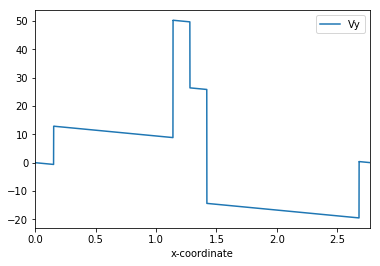

In [83]:
#shear diagram
# - along x axis (xy plane)
dfxsorted = df.sort_values(['x-coordinate'], ascending=[1])
v_total = []
xv_total = []
vtotal = 0
for i in range(0, len(dfxsorted.index)):
    vtotal = vtotal + dfxsorted.values[i,4] 
    xv_total.append(dfxsorted.values[i,0])
    v_total.append(vtotal)
    
shearxy = pd.DataFrame({'x-coordinate': xv_total, 'Vy': v_total})
for i in range(0, len(shearxy.index)-1):
    if shearxy.values[i,0] == shearxy.values[i+1 ,0]:
        shearxy.drop(shearxy.index[i])
    
shearxy.plot(x='x-coordinate', y='Vy')

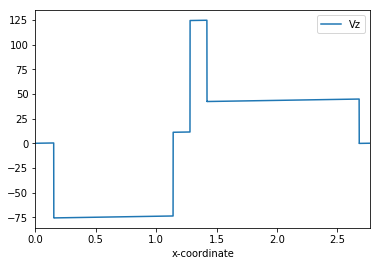

In [84]:
#shear diagram
# - along x axis (xz plane)
dfxsorted = df.sort_values(['x-coordinate'], ascending=[1])
v_total = []
xlocv_total = []
vtotal = 0
for i in range(0, len(dfxsorted.index)):
    vtotal = vtotal + dfxsorted.values[i,5] 
    xlocv_total.append(dfxsorted.values[i,0])
    v_total.append(vtotal)

shearxz = pd.DataFrame({'x-coordinate': xlocv_total, 'Vz': v_total})
for i in range(0, len(shearxz.index)-1):
    if shearxz.values[i,0] == shearxz.values[i+1 ,0]:
        shearxz.drop(shearxz.index[i])
    
shearxz.plot(x='x-coordinate', y='Vz')

In [85]:
"""
#moment diagram
# - around z axis xy plane
m_total = []
xlocm_total = []
mtotal = 0
for i in range(0, len(shearxy.index)):
    mtotal = mtotal + (shearxy.values[i,1] * (shearxy.values[i,0]))
    xlocm_total.append(shearxy.values[i,0])
    m_total.append(mtotal)
    
momentxy = pd.DataFrame({'x-coordinate': xlocm_total, 'Mz': m_total})
momentxy.plot(x='x-coordinate', y='Mz')
"""

"\n#moment diagram\n# - around z axis xy plane\nm_total = []\nxlocm_total = []\nmtotal = 0\nfor i in range(0, len(shearxy.index)):\n    mtotal = mtotal + (shearxy.values[i,1] * (shearxy.values[i,0]))\n    xlocm_total.append(shearxy.values[i,0])\n    m_total.append(mtotal)\n    \nmomentxy = pd.DataFrame({'x-coordinate': xlocm_total, 'Mz': m_total})\nmomentxy.plot(x='x-coordinate', y='Mz')\n"

In [86]:
"""
#moment diagram
# - around y axis xz plane
m_total = []
xlocm_total = []
mtotal = 0
for i in range(0, len(dfxsorted.index)):
    mtotal = mtotal + (dfxsorted.values[i,5] * dfxsorted.values[i,0])
    xlocm_total.append(dfxsorted.values[i,0])
    m_total.append(mtotal)
    
momentxz = pd.DataFrame({'x-coordinate': xlocm_total, 'My': m_total})
momentxz.plot(x='x-coordinate', y='My')
"""

"\n#moment diagram\n# - around y axis xz plane\nm_total = []\nxlocm_total = []\nmtotal = 0\nfor i in range(0, len(dfxsorted.index)):\n    mtotal = mtotal + (dfxsorted.values[i,5] * dfxsorted.values[i,0])\n    xlocm_total.append(dfxsorted.values[i,0])\n    m_total.append(mtotal)\n    \nmomentxz = pd.DataFrame({'x-coordinate': xlocm_total, 'My': m_total})\nmomentxz.plot(x='x-coordinate', y='My')\n"

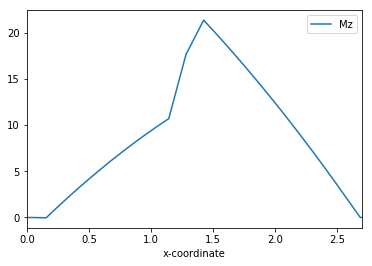

In [87]:
m_total = []
mindv = 0

for i in range(0,len(dfxsorted.index)):
    for j in range(0,len(dfxsorted.index)):
        if dfxsorted.values[j,0] < dfxsorted.values[i,0]:
            mcont = dfxsorted.values[j, 4] * (dfxsorted.values[i, 0] - dfxsorted.values[j, 0])
            mindv = mindv + mcont
        if j == len(dfxsorted.index) - 1:
            m_total.append(mindv)
            mindv = 0

momentxz = pd.DataFrame({'x-coordinate': df.values[:2700,0], 'Mz': m_total[:2700]})
momentxz.plot(x='x-coordinate', y='Mz')

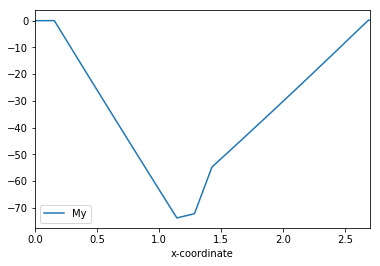

In [88]:
m_total = []
mindv = 0

for i in range(0,len(dfxsorted.index)):
    for j in range(0,len(dfxsorted.index)):
        if dfxsorted.values[j,0] < dfxsorted.values[i,0]:
            mcont = dfxsorted.values[j, 5] * (dfxsorted.values[i, 0] - dfxsorted.values[j, 0])
            mindv = mindv + mcont
        if j == len(dfxsorted.index) - 1:
            m_total.append(mindv)
            mindv = 0

momentxy = pd.DataFrame({'x-coordinate': df.values[:2700,0], 'My': m_total[:2700]})
momentxy.plot(x='x-coordinate', y='My')

In [89]:
momentxy.to_csv('momentxy.csv',index=False)
momentxz.to_csv('momentxz.csv',index=False)
shearxy.to_csv('shearxy.csv',index=False)
shearxz.to_csv('shearxz.csv',index=False)

In [106]:
# Torque calculations
# arm calculations for the torque
y_arm_sc = []
z_arm_sc = []
for i in range(0,len(df_torque.index)):
    y_arm_sc.append(df_torque.values[i,1] - y_sc)
    z_arm_sc.append(df_torque.values[i,2] - z_sc)


# Torque around x = Sy * dz + Sz* dy
t_x = []
for i in range(0,len(df_torque.index)):
    t_x.append( df_torque.values[i,4]*z_arm_sc[i]  + df_torque.values[i,5] * y_arm_sc[i])

df_torque['T_x'] = t_x # adding torques to dataframe
df_torque_sorted = df_torque.sort_values(['x-coordinate'], ascending=[1]) # sort wrt x-axis

# Torque diagram

t_total = []
tindv = 0

test = np.cumsum(df_torque_sorted.values[:,-1])
df_torsion = pd.DataFrame()
df_torsion['x'] = df_torque_sorted.values[:,0]
df_torsion['Torsion'] = test[:]

df_torsion.to_csv('torsion.csv')

x-coordinate  y-coordinate  z-coordinate   Fx        Fy        Fz  \
0            0.000           0.0        -0.031  0.0 -0.004072  0.001986   
1            0.001           0.0        -0.031  0.0 -0.004072  0.001986   
2            0.002           0.0        -0.031  0.0 -0.004072  0.001986   
3            0.003           0.0        -0.031  0.0 -0.004072  0.001986   
4            0.004           0.0        -0.031  0.0 -0.004072  0.001986   
5            0.005           0.0        -0.031  0.0 -0.004072  0.001986   
6            0.006           0.0        -0.031  0.0 -0.004072  0.001986   
7            0.007           0.0        -0.031  0.0 -0.004072  0.001986   
8            0.008           0.0        -0.031  0.0 -0.004072  0.001986   
9            0.009           0.0        -0.031  0.0 -0.004072  0.001986   
10           0.010           0.0        -0.031  0.0 -0.004072  0.001986   
11           0.011           0.0        -0.031  0.0 -0.004072  0.001986   
12           0.012           0.0        -0.031  0.0 -0.004072  0.001986   
13           0.013           0.0        -0.031  0.0 -0.004072  0.001986   
14           0.014           0.0        -0.031  0.0 -0.004072  0.001986   
15           0.015           0.0        -0.031  0.0 -0.004072  0.001986   
16           0.016           0.0        -0.031  0.0 -0.004072  0.001986   
17           0.017           0.0        -0.031  0.0 -0.004072  0.001986   
18           0.018           0.0        -0.031  0.0 -0.004072  0.001986   
19           0.019           0.0        -0.031  0.0 -0.004072  0.001986   
20           0.020           0.0        -0.031  0.0 -0.004072  0.001986   
21           0.021           0.0        -0.031  0.0 -0.004072  0.001986   
22           0.022           0.0        -0.031  0.0 -0.004072  0.001986   
23           0.023           0.0        -0.031  0.0 -0.004072  0.001986   
24           0.024           0.0        -0.031  0.0 -0.004072  0.001986   
25           0.025           0.0        -0.031  0.0 -0.004072  0.001986   
26           0.026           0.0        -0.031  0.0 -0.004072  0.001986   
27           0.027           0.0        -0.031  0.0 -0.004072  0.001986   
28           0.028           0.0        -0.031  0.0 -0.004072  0.001986   
29           0.029           0.0        -0.031  0.0 -0.004072  0.001986   
...            ...           ...           ...  ...       ...       ...   
2742         2.742           0.0        -0.031  0.0 -0.004072  0.001986   
2743         2.743           0.0        -0.031  0.0 -0.004072  0.001986   
2744         2.744           0.0        -0.031  0.0 -0.004072  0.001986   
2745         2.745           0.0        -0.031  0.0 -0.004072  0.001986   
2746         2.746           0.0        -0.031  0.0 -0.004072  0.001986   
2747         2.747           0.0        -0.031  0.0 -0.004072  0.001986   
2748         2.748           0.0        -0.031  0.0 -0.004072  0.001986   
2749         2.749           0.0        -0.031  0.0 -0.004072  0.001986   
2750         2.750           0.0        -0.031  0.0 -0.004072  0.001986   
2751         2.751           0.0        -0.031  0.0 -0.004072  0.001986   
2752         2.752           0.0        -0.031  0.0 -0.004072  0.001986   
2753         2.753           0.0        -0.031  0.0 -0.004072  0.001986   
2754         2.754           0.0        -0.031  0.0 -0.004072  0.001986   
2755         2.755           0.0        -0.031  0.0 -0.004072  0.001986   
2756         2.756           0.0        -0.031  0.0 -0.004072  0.001986   
2757         2.757           0.0        -0.031  0.0 -0.004072  0.001986   
2758         2.758           0.0        -0.031  0.0 -0.004072  0.001986   
2759         2.759           0.0        -0.031  0.0 -0.004072  0.001986   
2760         2.760           0.0        -0.031  0.0 -0.004072  0.001986   
2761         2.761           0.0        -0.031  0.0 -0.004072  0.001986   
2762         2.762           0.0        -0.031  0.0 -0.004072  0.001986   
2763         2.763           0.

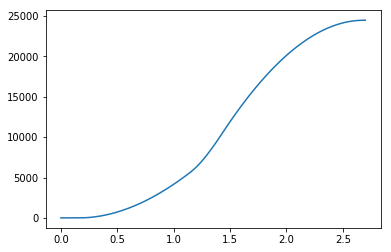

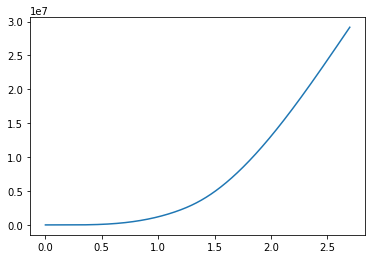

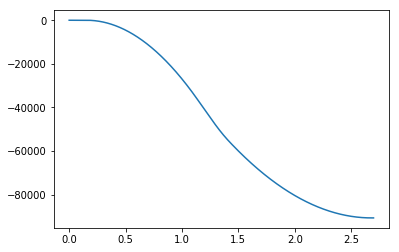

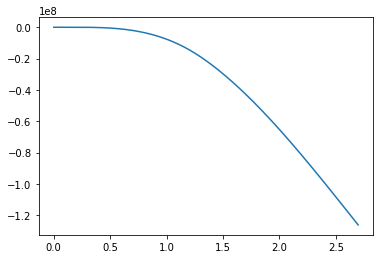